In [54]:
import matplotlib.pyplot as plt
import numpy as np
import mediapy as media
from pathlib import Path
from tqdm import tqdm
from einops import rearrange, reduce

In [2]:
!ls baselines

__pycache__                      ppo_parallel.py
all_runs.json                    ray_baseline.py
best_12-7                        real_good_ratta
eval_trained.py                  red_gym_env.py
final_states_train_1             requirements.txt
good_route                       run_baseline.py
grinds_to_level_11_extra_time_14 run_baseline_parallel.py
lvl_22                           run_baseline_videos.py
old                              session_27b1e733
old_3                            session_3fe1d05b
old_good                         session_4f24366b
old_good_2                       session_ab44a5cd
old_long                         session_approaches_victory_road
old_refactor_vr                  session_b53741ad
old_somethinggood?               session_c483ca55
poke_0.zip                       session_cf7d4662
poke_1.zip                       session_e67f1a36
poke_12.zip                      session_evolve_sucsess
poke_2.zip                       session_fcb6cf24
poke_4.zip           

In [18]:
runs_dir = Path('baselines/video_session_ff80d382/rollouts')

In [43]:
vid_sections = []
def parse_reward(p):
    return float(p.name.split('_')[2])
for r in tqdm(sorted(list(runs_dir.glob('*full.mp4')), key=parse_reward)):
    #print(r)
    vid_sections.append(media.read_video(r))

100%|██████████| 84/84 [00:57<00:00,  1.46it/s]


In [44]:
vid_sections = np.array(vid_sections)

(64, 3072, 144, 160, 3)

In [48]:
pixels = vid_sections
pixels.shape

(84, 3072, 144, 160, 3)

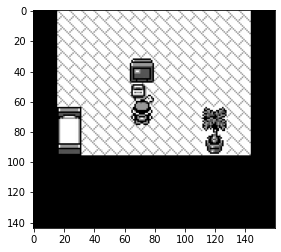

In [49]:
plt.imshow(pixels[0][0])

In [50]:
#pixels = pixels[:64]
#pixels.shape

(4, 1008, 1920, 3)


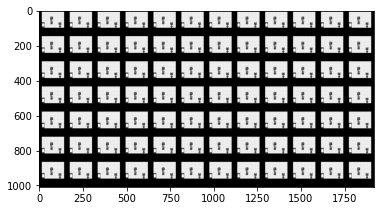

In [51]:
grid = rearrange(pixels[:, :4, :, :, :], '(x y) f h w c -> f (y h) (x w) c', x=12)
print(grid.shape)
plt.imshow(grid[0])

In [53]:
media.write_video('grid_test.mp4', rearrange(pixels[:, ::4, :, :, :], '(x y) f h w c -> f (y h) (x w) c', x=12))

(4, 144, 160, 3)


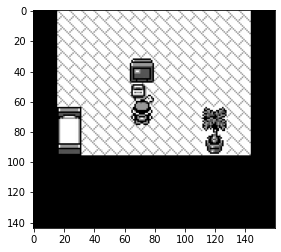

In [60]:
red = reduce(pixels[:, :4, :, :, :].astype(np.float32), 'v f h w c -> f h w c', 'mean').astype(np.uint8)
print(red.shape)
plt.imshow(red[0])

In [62]:
media.write_video('grid_reduce_test.mp4', reduce(pixels[:, ::2, :, :, :].astype(np.float32), 'v f h w c -> f h w c', 'mean').astype(np.uint8))

